In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = '/content/1.jpg'
image = cv2.imread(image_path)

# Task 1: Enhance Image Quality (Adaptive Histogram Equalization)
def enhance_image_quality(img):
    # Convert to YUV color space
    yuv_img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to the Y channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    yuv_img[:, :, 0] = clahe.apply(yuv_img[:, :, 0])
    # Convert back to BGR color space
    enhanced_img = cv2.cvtColor(yuv_img, cv2.COLOR_YUV2BGR)
    return enhanced_img

enhanced_image = enhance_image_quality(image)

In [2]:
# Task 2: Detect Edges for Vehicles and Road Markings
def detect_edges(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Use GaussianBlur to reduce noise and detail
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # Perform Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)
    return edges

edges_image = detect_edges(enhanced_image)



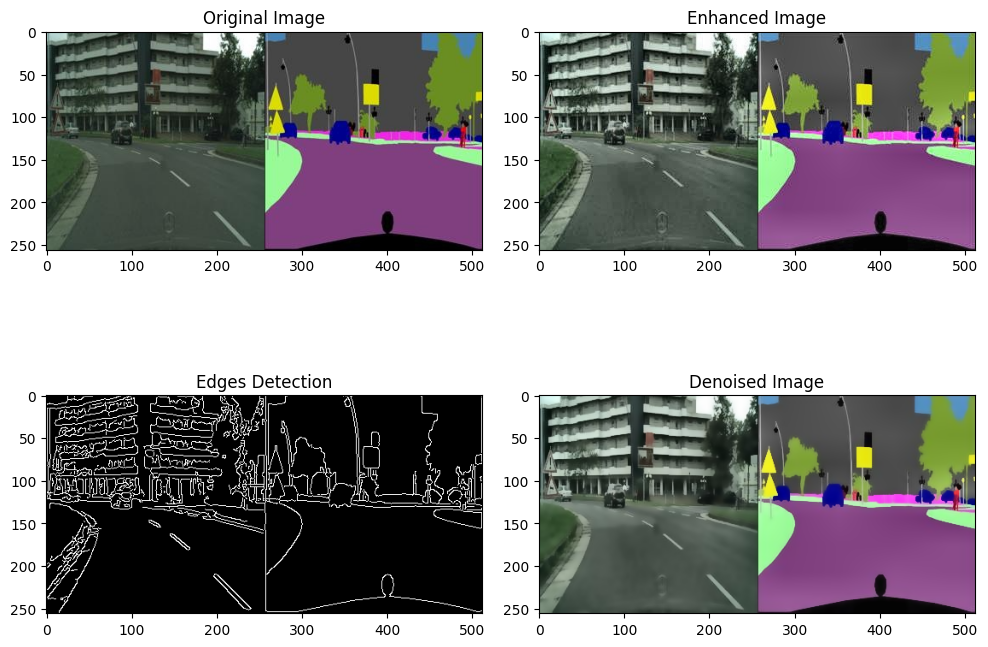

In [3]:
# Task 3: Apply Filters to Reduce Noise and Improve Clarity of Moving Objects
def reduce_noise(img):
    # Apply a bilateral filter, which is effective in reducing noise while keeping edges sharp
    denoised_img = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)
    return denoised_img

denoised_image = reduce_noise(enhanced_image)

# Display results
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 2)
plt.title('Enhanced Image')
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 3)
plt.title('Edges Detection')
plt.imshow(edges_image, cmap='gray')

plt.subplot(2, 2, 4)
plt.title('Denoised Image')
plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()